In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [84]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [85]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

In [6]:
data = pd.read_csv('clean_data_smoke_detection')

In [7]:
data.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,NC0.5,NC2.5,CNT,Fire Alarm
0,56932,1654774206,27.050,47.12,1046,528,12840,19467,938.913,1.92,13.24,0.047,12863,1
1,42580,1654740849,-4.194,52.77,279,400,13117,19978,939.484,0.57,3.93,0.014,7518,1
2,57970,1654783726,26.100,52.50,1325,400,12972,19396,938.735,1.85,12.73,0.045,22383,1
3,40623,1654755085,-9.340,49.90,1367,417,12952,19396,938.709,2.02,13.93,0.049,21754,1
4,3591,1654715204,25.790,48.97,181,430,12760,20537,937.331,2.08,14.31,0.050,3017,0


In [8]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [9]:
data.shape

(61472, 13)

In [10]:
features = data.drop(['Fire Alarm'], axis=1)
y = data['Fire Alarm']

In [11]:
# Managing data imbalance 
# Oversampling using SMOTE

In [12]:
X_sm, y_sm = SMOTE().fit_resample(features, y)
y_sm.value_counts()

1    43632
0    43632
Name: Fire Alarm, dtype: int64

In [13]:
# Scaling the numberical features for Logistic Regression and KNN
# For Random Forest

In [14]:
scaler = StandardScaler()
scaled_X_sm = scaler.fit_transform(X_sm)
scaled_X_sm

array([[-0.26039929,  0.70049344, -0.01183483, ..., -0.13189592,
        -0.08698715,  0.62151132],
       [-0.49841144, -1.44337718,  0.56908836, ..., -0.13372381,
        -0.08701816, -0.09842838],
       [-0.19247125,  0.63530726,  0.54132743, ..., -0.13199605,
        -0.08698903,  1.90379868],
       ...,
       [-0.54384188,  0.700202  ,  0.30547793, ..., -0.133946  ,
        -0.08702192, -0.95602539],
       [ 2.23948102,  0.70386092, -0.18188802, ..., -0.13183299,
        -0.08698632, -1.07711535],
       [-0.68403622,  0.62937609,  0.08865979, ..., -0.13207596,
        -0.08699036, -0.7545231 ]])

In [67]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(scaled_X_sm, y_sm, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((61084, 12), (26180, 12), (61084,), (26180,))

In [100]:
def model_accuracy(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    print('Classification Score: ', model.score(X_test, y_test))
    print('Precision Score: ', precision_score(y_test, predictions))
    print('Recall Score: ', recall_score(y_test, predictions))
    print('f1-Score: ', f1_score(y_test, predictions))
    
    # plot confusion matrix 
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()
    
    # plot roc auc curve
    
    fpr, tpr, _ = roc_curve(y_test, predictions)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0,1], [0,1], 'r--')
    plt.title('ROC Curve for ' + str(type(model)).split('.')[-1], fontsize = 15)
    plt.xlabel('False Positive Rate (1- Specificity)', fontsize = 12)
    plt.ylabel('True Positive Rate (Sensitivity)', fontsize = 12)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, predictions), 4)))
    plt.grid(True)
    plt.show()

In [69]:
# Logistic Regression: using default parameters

Classification Score:  0.9998854087089382


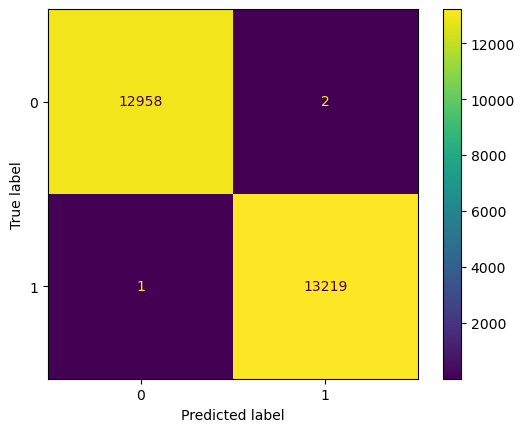

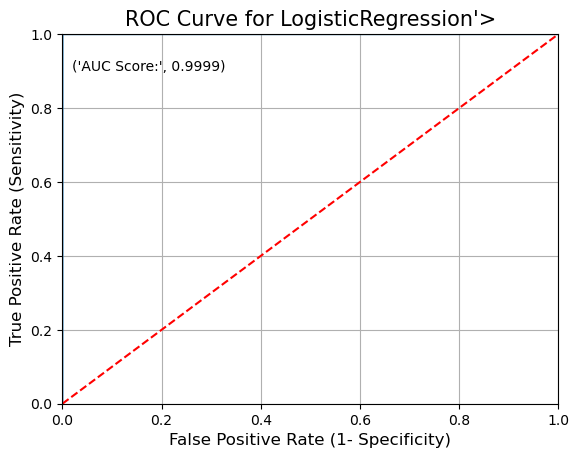

In [94]:
logistic_regression = LogisticRegression()
model_accuracy(logistic_regression, X_train, X_test, y_train, y_test)

In [74]:
# KNN Classifier

Text(0, 0.5, 'Accuracy')

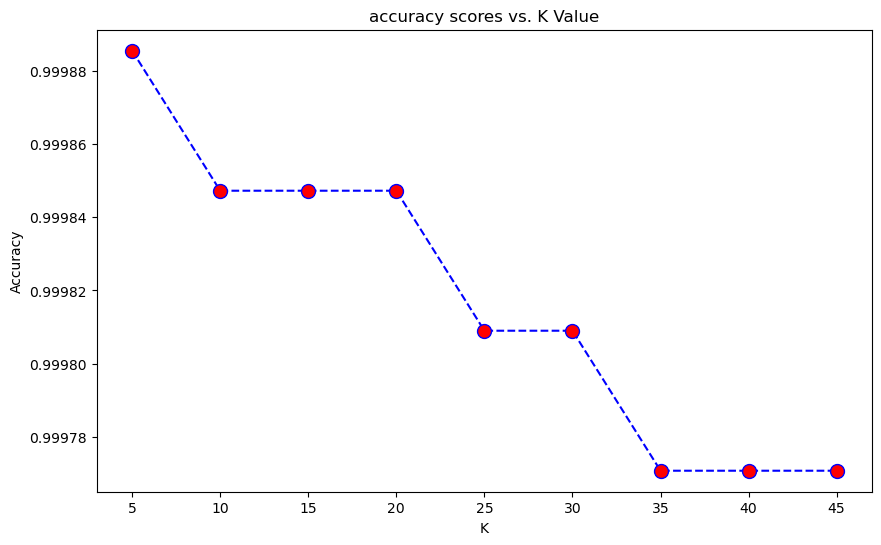

In [77]:
scores = []
for i in range(5,50,5):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.figure(figsize=(10,6))
plt.plot(range(5,50,5),scores,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [78]:
# Using 20 as the value of k in KNN Classifier

Classification Score:  0.9998472116119175


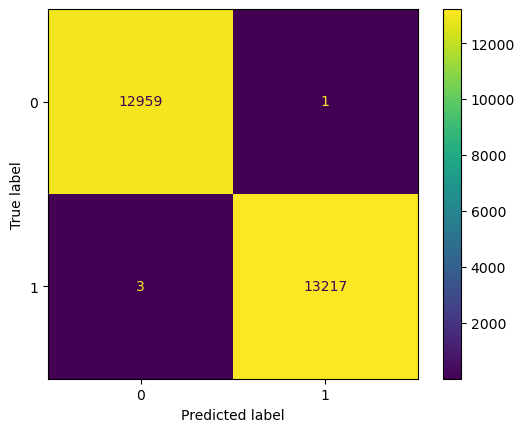

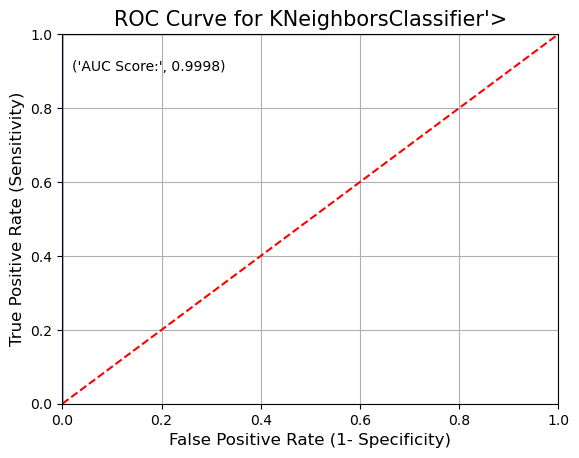

In [95]:
knn_classifier = KNeighborsClassifier(n_neighbors=20)
model_accuracy(knn_classifier, X_train, X_test, y_train, y_test)

In [71]:
# Random forest classifier 

In [96]:
random_forest = RandomForestClassifier()

Classification Score:  1.0


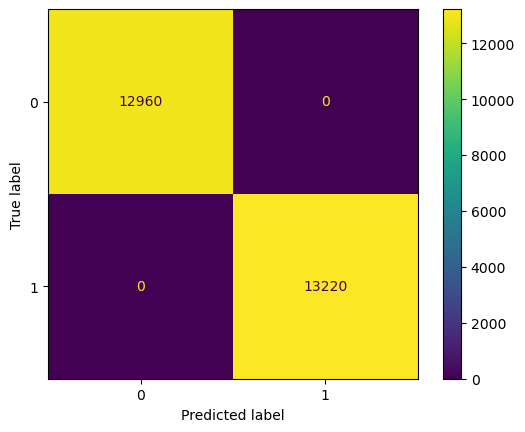

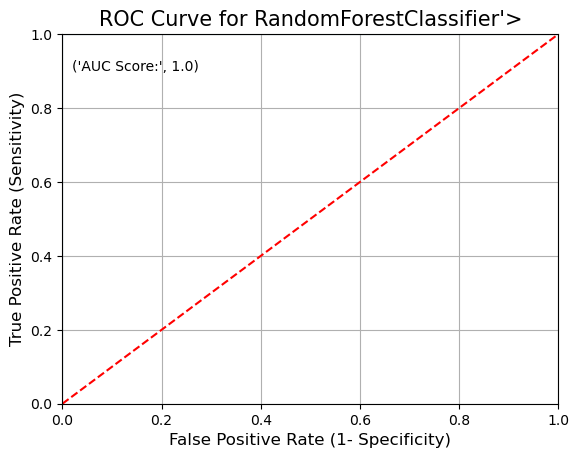

In [97]:
model_accuracy(random_forest, X_train, X_test, y_train, y_test)

In [81]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [2, 4],
    'max_features': ['sqrt', 'log2', None]
    }
clf_model = RandomForestClassifier(random_state=100)
grid_search = RandomizedSearchCV(clf_model, param_grid, cv=5,return_train_score=True)

In [82]:
grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
                   param_distributions={'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [2, 4],
                                        'min_samples_split': [2, 4],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   return_train_score=True)

In [87]:
grid_search.best_params_ #To check the best set of parameters returned

{'n_estimators': 400,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt'}

In [89]:
clf_model = RandomForestClassifier(n_estimators=400 , max_features='sqrt', 
                             min_samples_leaf=2, min_samples_split=4, random_state=0)
cross_val_scores = cross_val_score(clf_model, X_train, y_train, cv=5)
print(np.mean(cross_val_scores))

1.0


Classification Score:  1.0


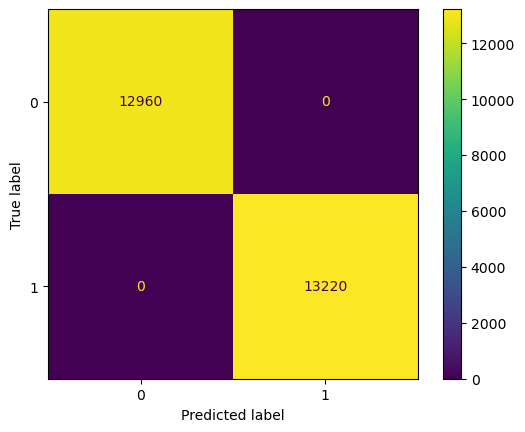

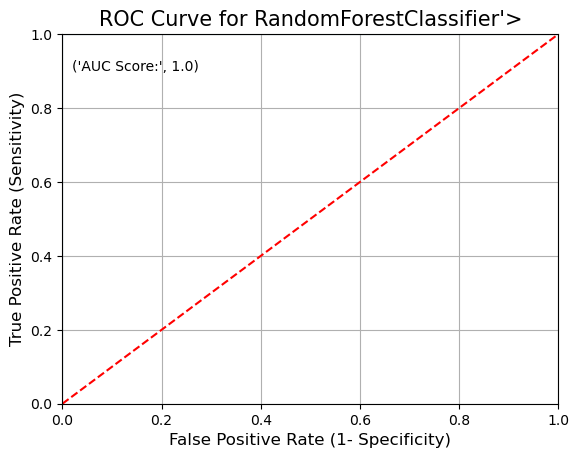

In [98]:
model_accuracy(clf_model, X_train, X_test, y_train, y_test)